# Finance & Risk Analytics Project

# Problem Statement

**Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.**

**A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.**

**Data that is available includes information from the financial statement of the companies for the previous year.**

**Explanation of data fields available in Data Dictionary, 'Credit Default Data Dictionary.xlsx'**

Hints :

**Test Train Split -   Split the data into Train and Test dataset in a ratio of 67:33 and use random_state =42. Model Building is to be done on Train Dataset and Model Validation is to be done on Test Dataset.**

**Credit Risk Dataset**

**Data Dictionary**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#!pip install imblearn

In [2]:
# loading dataset

df=pd.read_excel('CompData-1.xlsx')

In [3]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [4]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,NaN,NaN,NaN,17572.113217,21892.886518,4.0,3674.0,6240.0,24280.75,72493.0
Co_Name,2058,2058,Hind.Cables,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_Operating_Expense_Rate,2058.0,NaN,NaN,NaN,2052388835.763358,3252623690.289408,0.0001,0.000158,0.000333,4110000000.0,9980000000.0
_Research_and_development_expense_rate,2058.0,NaN,NaN,NaN,1208634256.559841,2144568158.080904,0.0,0.0,0.000199,1550000000.0,9980000000.0
_Cash_flow_rate,2058.0,NaN,NaN,NaN,0.465243,0.022663,0.0,0.460099,0.463445,0.468069,1.0
_Interest_bearing_debt_interest_rate,2058.0,NaN,NaN,NaN,11130223.519098,90425949.044486,0.0,0.000276,0.000454,0.000663,990000000.0
_Tax_rate_A,2058.0,NaN,NaN,NaN,0.114777,0.152446,0.0,0.0,0.037099,0.216191,0.999696
_Cash_Flow_Per_Share,1891.0,NaN,NaN,NaN,0.319986,0.0153,0.169449,0.314989,0.320648,0.325918,0.462227
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,NaN,NaN,NaN,0.176967,0.030157,0.0,0.166604,0.175642,0.185885,0.792348
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,NaN,NaN,NaN,0.022761,0.021701,0.004282,0.022058,0.0221,0.022152,1.0


In [7]:
#checking for duplicates

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default


In [8]:
df['Default'].value_counts(normalize=True)

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [9]:
df.size

119364

# 1.1 Let's check the number of outliers per column

In [10]:
df_num= df.select_dtypes(include=['float64','int64'])

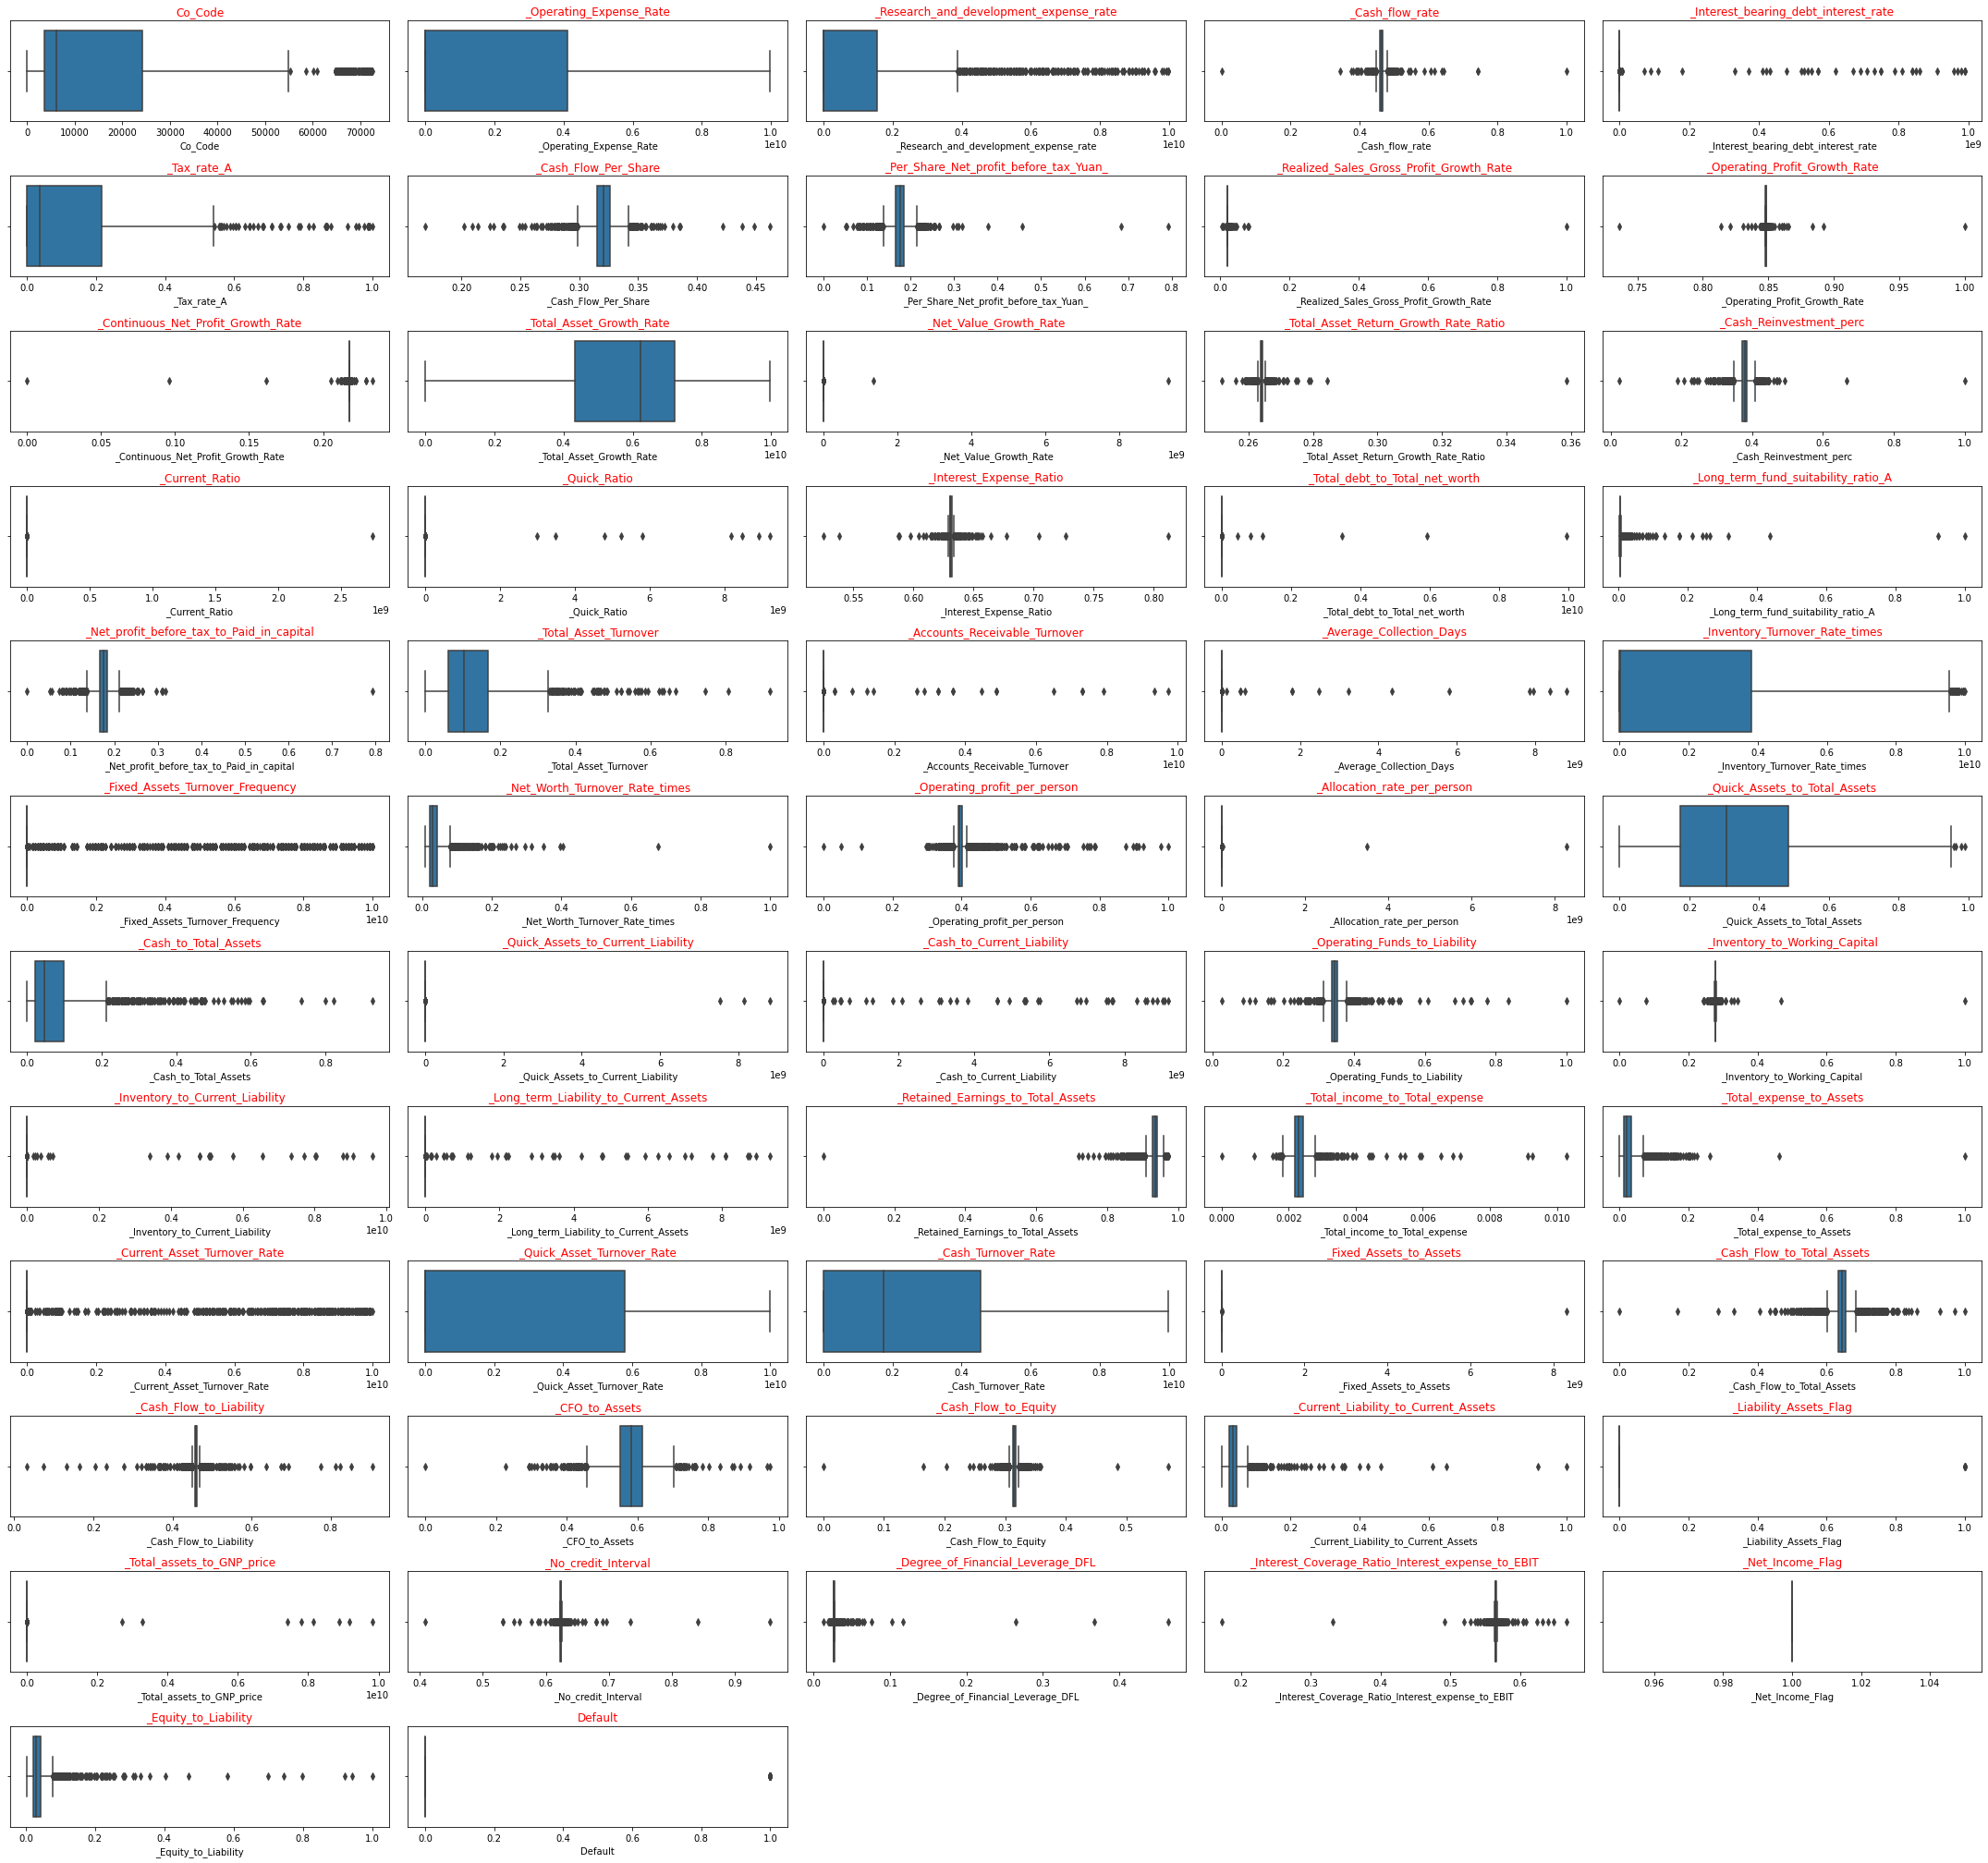

In [11]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

In [12]:
def treat_outlier(x):

    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)

    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: dt if y > upper_bound else y)

In [13]:
def print_outlier(x):
    
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    min_val = min(x)
    max_val = max(x)
   
    IQR=q75-q25
    
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
 
    return ('5%=',q5,'Q1=',q25,'Q3=',q75,'IQR=',IQR,'LL=',lower_bound,'UL=', upper_bound, '95%', dt, 'max=',max_val, 'min=',min_val)

In [14]:
for i in df_num.columns:    
    df_num[i]=treat_outlier(df_num[i])

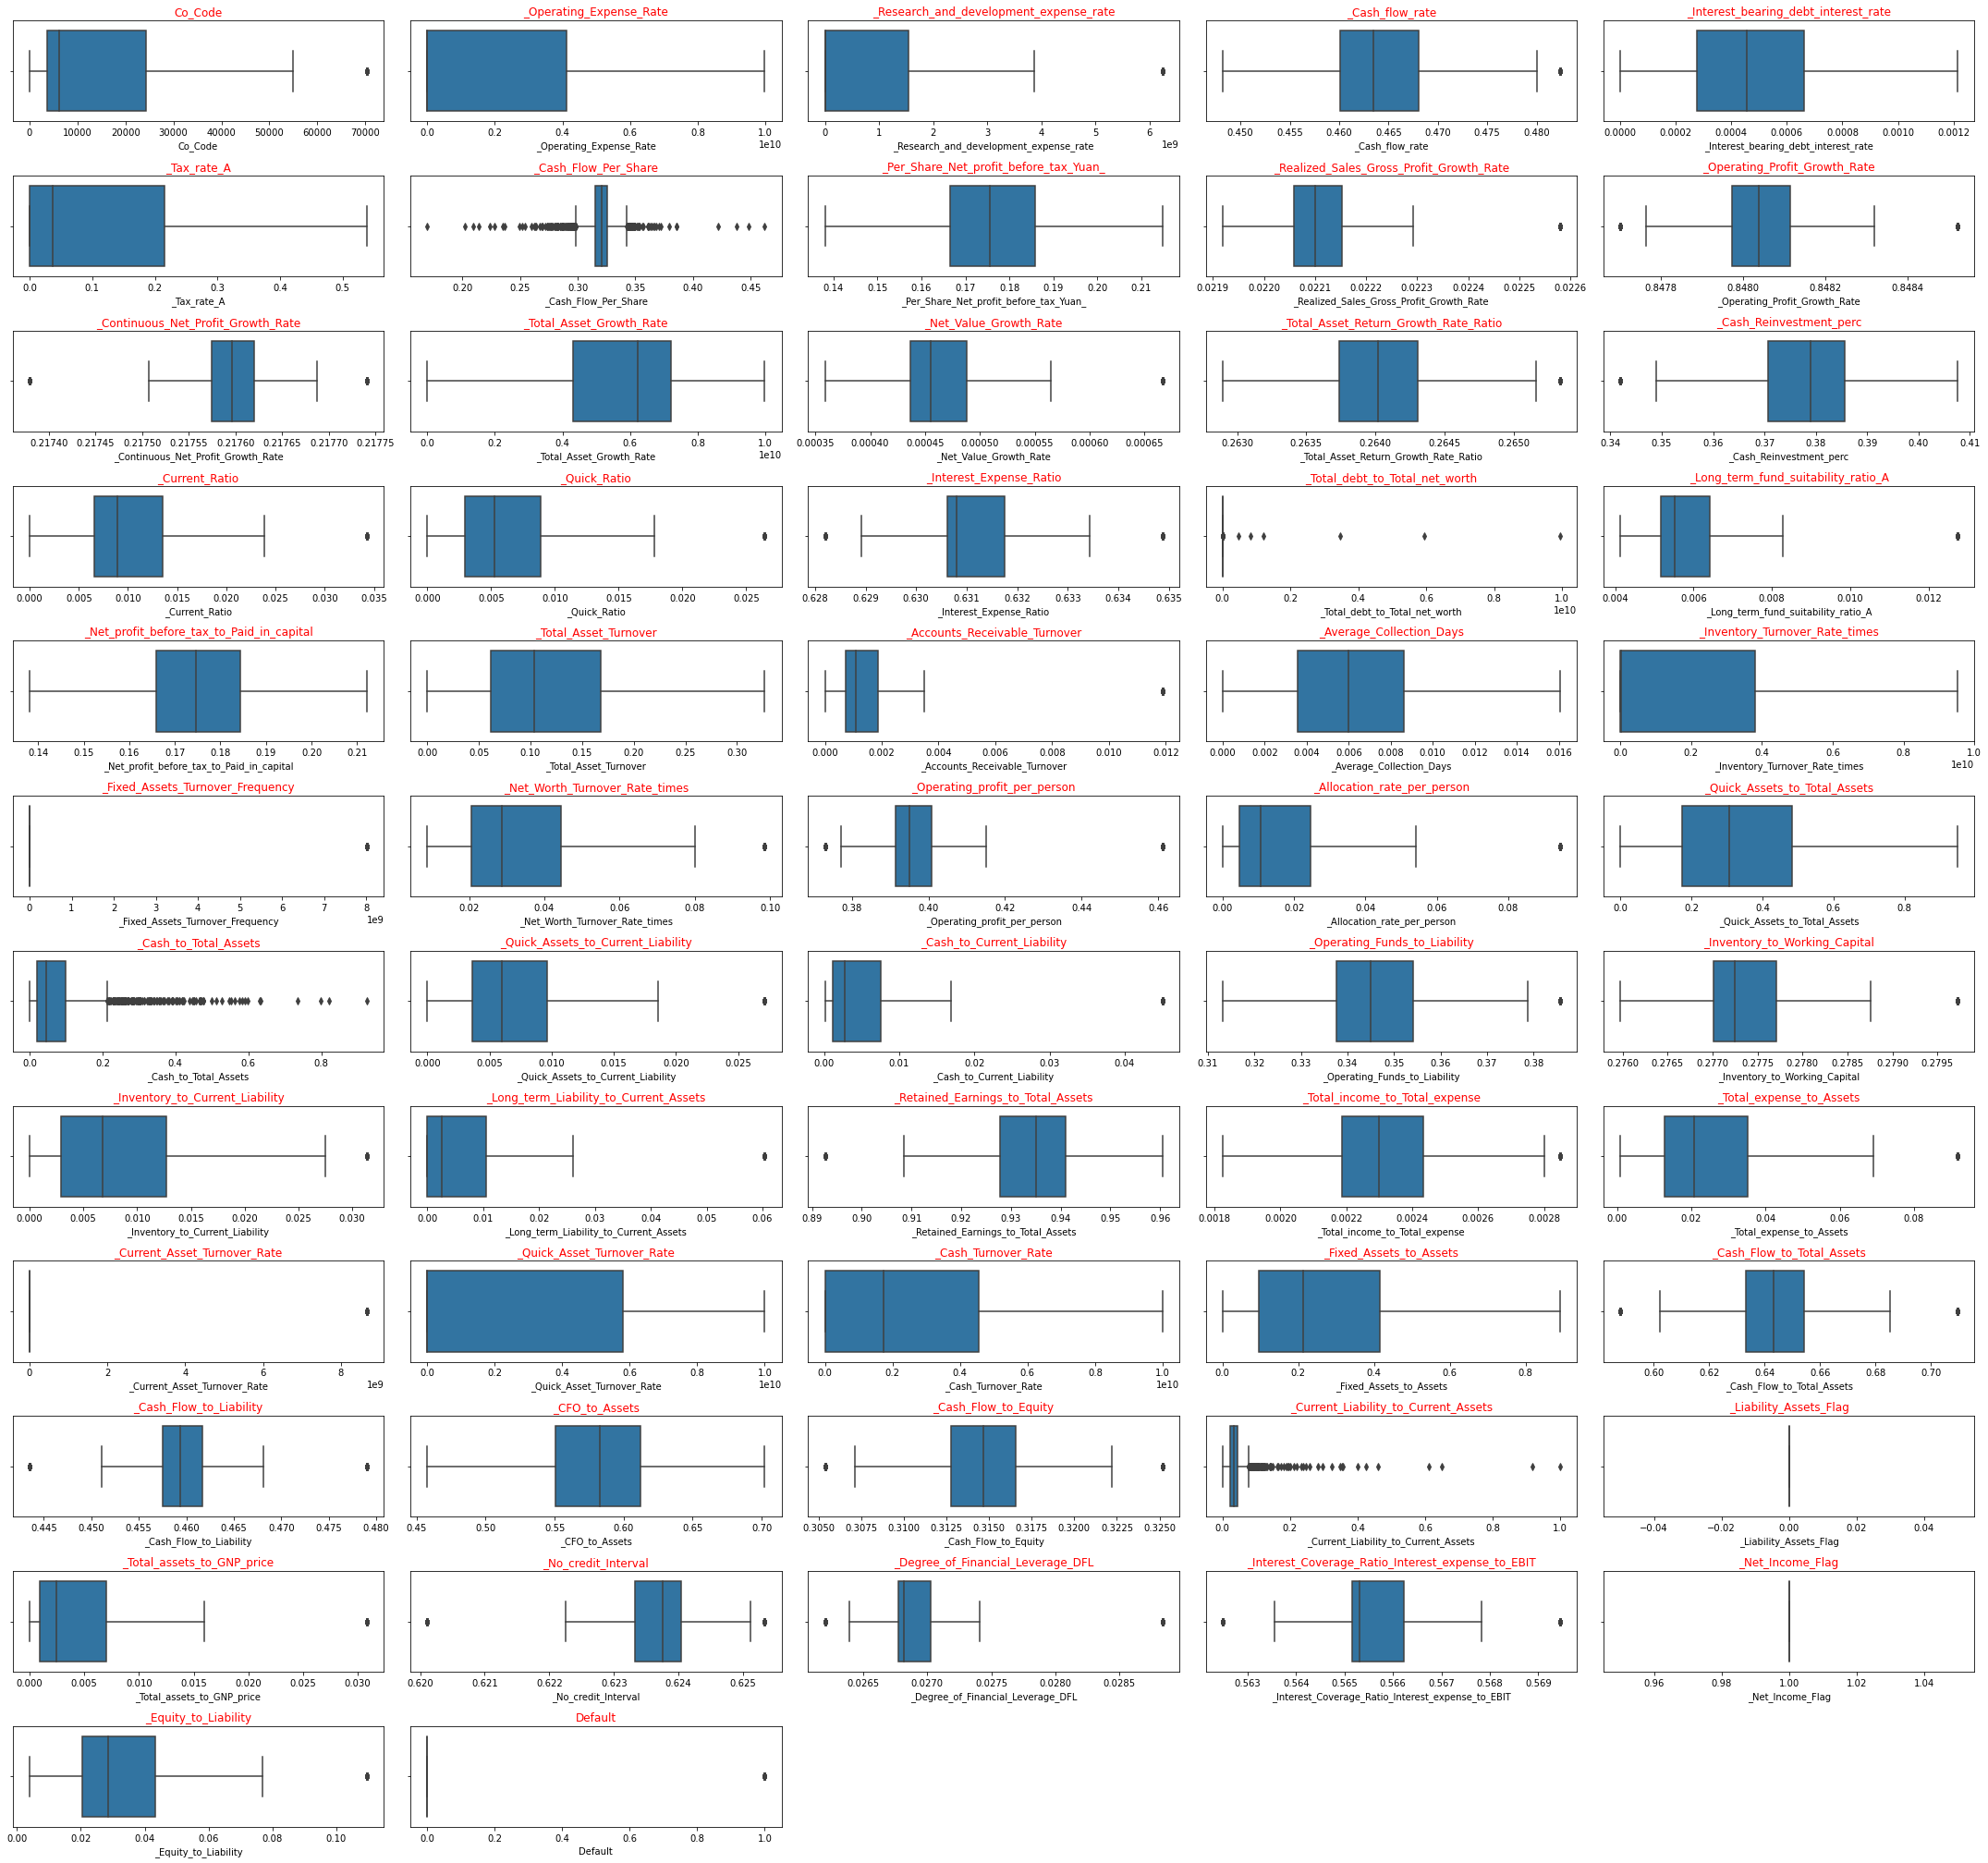

In [15]:
data_plot=df_num
fig=plt.figure(figsize=(30,30))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(13,5,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()

# 1.2 Missing Value Treatment

In [16]:
df.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

Imputing missing values with median

In [17]:
df['_Cash_to_Total_Assets'] = df['_Cash_to_Total_Assets'].fillna(df['_Cash_to_Total_Assets'].median())

In [18]:
df['_Total_debt_to_Total_net_worth'] = df['_Total_debt_to_Total_net_worth'].fillna(df['_Total_debt_to_Total_net_worth'].median())

In [19]:
df['_Current_Liability_to_Current_Assets'] = df['_Current_Liability_to_Current_Assets'].fillna(df['_Current_Liability_to_Current_Assets'].median())

In [20]:
df['_Cash_Flow_Per_Share'] = df['_Cash_Flow_Per_Share'].fillna(df['_Cash_Flow_Per_Share'].median())

In [21]:
df.isnull().sum()

Co_Code                                              0
Co_Name                                              0
_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_

# 1.3 Univariate & Bivariate analysis 

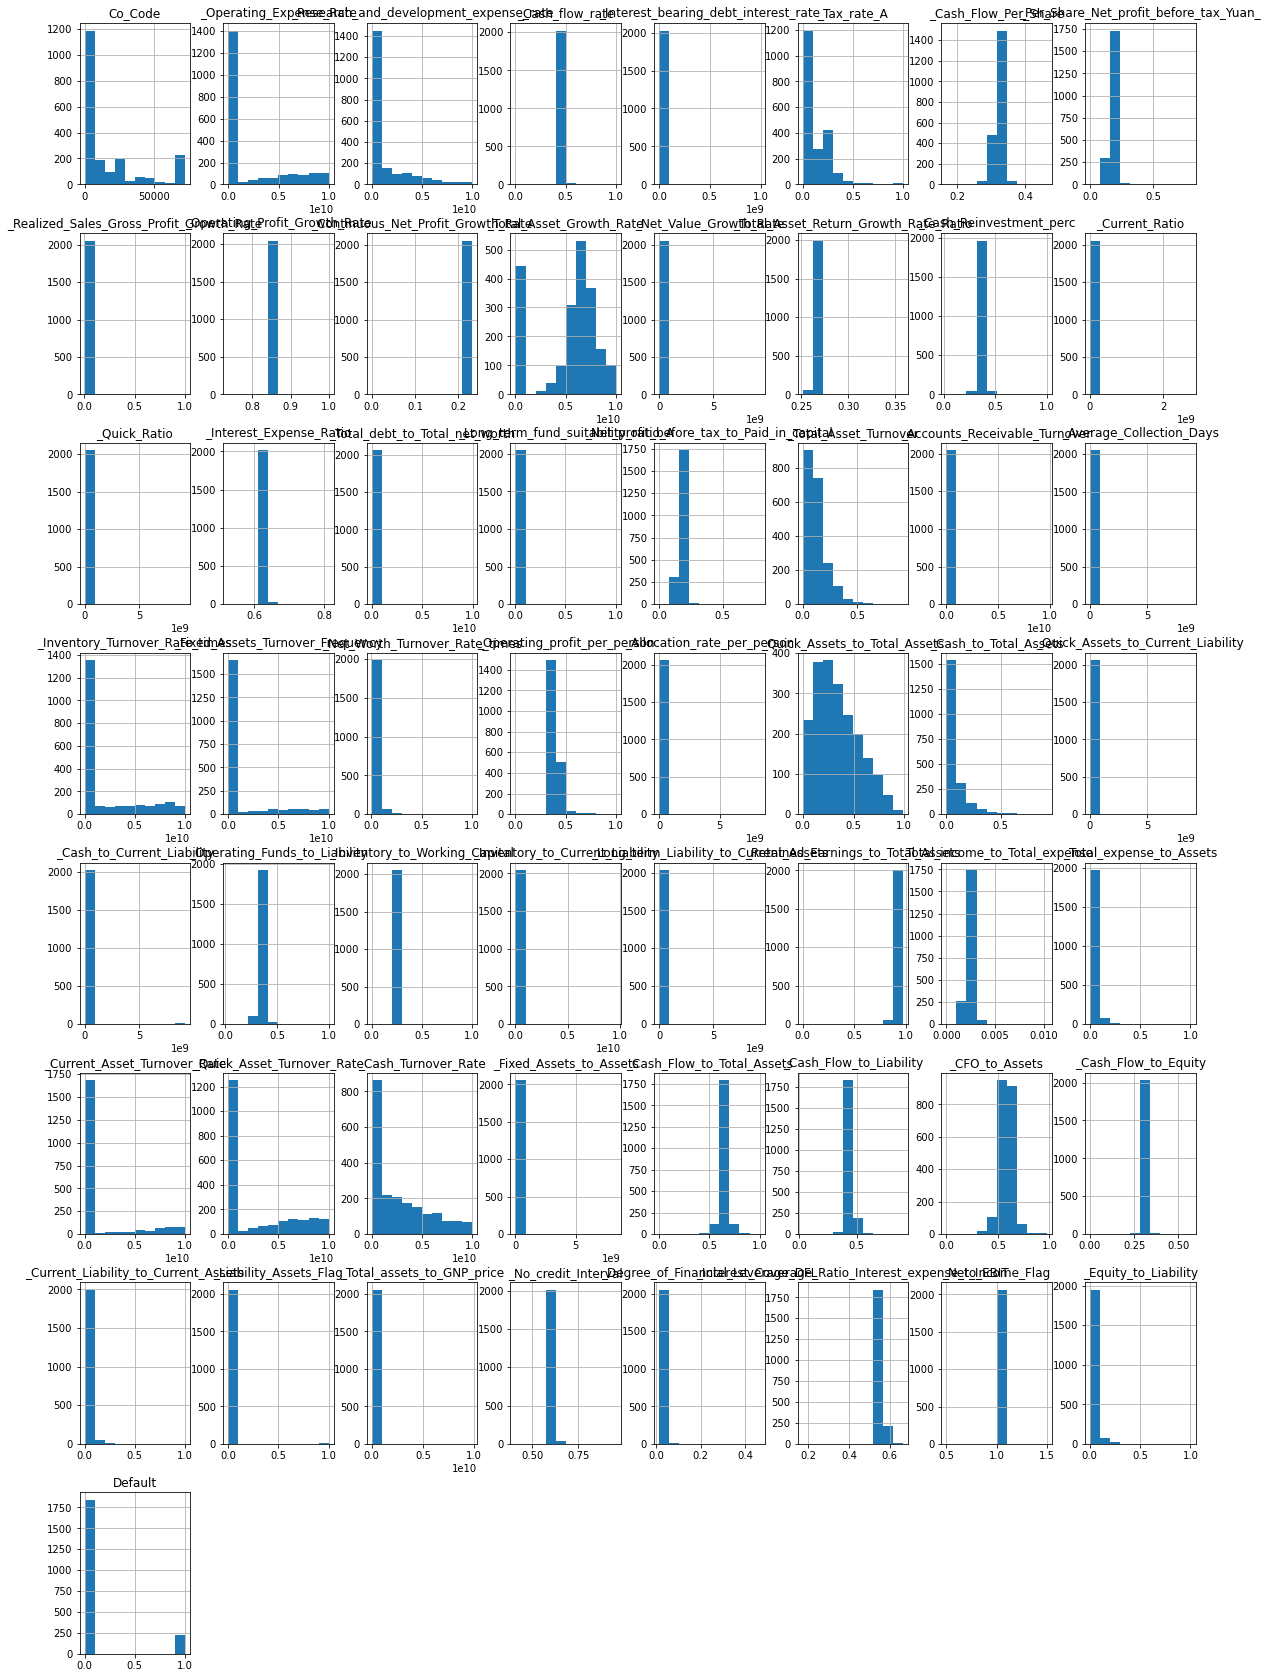

In [22]:
df.hist(figsize=(20,30));

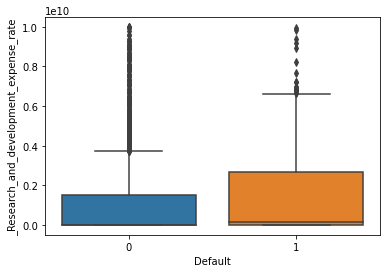

In [23]:
sns.boxplot(x="Default", y = "_Research_and_development_expense_rate", data=df);

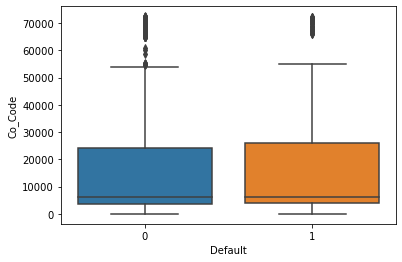

In [24]:
sns.boxplot(x="Default", y = "Co_Code", data=df);

<AxesSubplot:xlabel='Default', ylabel='_Operating_Expense_Rate'>

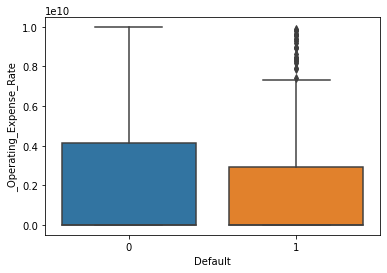

In [25]:
sns.boxplot(x="Default", y = "_Operating_Expense_Rate", data=df)

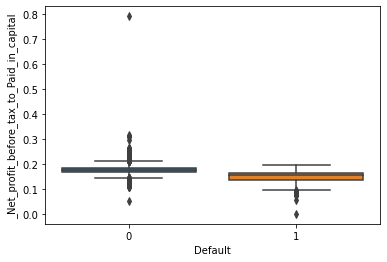

In [26]:
sns.boxplot(x="Default", y = "_Net_profit_before_tax_to_Paid_in_capital", data=df);

<AxesSubplot:xlabel='_Per_Share_Net_profit_before_tax_Yuan_'>

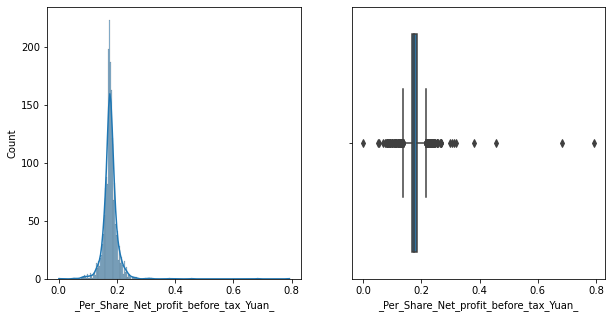

In [27]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df._Per_Share_Net_profit_before_tax_Yuan_, kde=True, ax=axs[0])
sns.boxplot(x='_Per_Share_Net_profit_before_tax_Yuan_',data=df, ax=axs[1])

<AxesSubplot:xlabel='_Operating_Expense_Rate'>

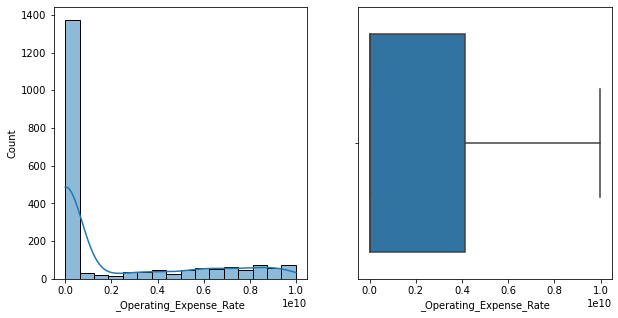

In [28]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df._Operating_Expense_Rate, kde=True, ax=axs[0])
sns.boxplot(x='_Operating_Expense_Rate',data=df, ax=axs[1])

<AxesSubplot:xlabel='_Research_and_development_expense_rate'>

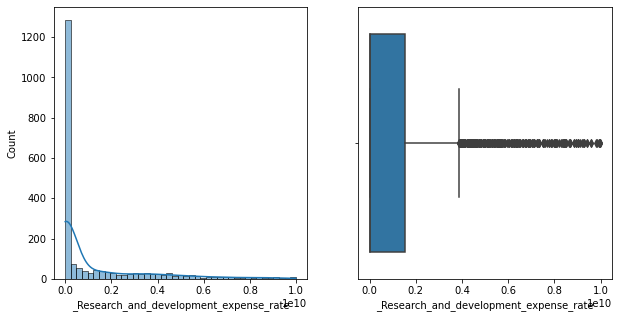

In [29]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df._Research_and_development_expense_rate, kde=True, ax=axs[0])
sns.boxplot(x='_Research_and_development_expense_rate',data=df, ax=axs[1])

<AxesSubplot:xlabel='_Cash_Flow_Per_Share'>

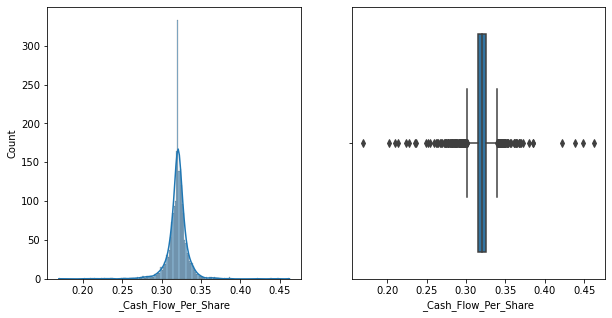

In [30]:
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
sns.histplot(df._Cash_Flow_Per_Share, kde=True, ax=axs[0])
sns.boxplot(x='_Cash_Flow_Per_Share',data=df, ax=axs[1])

**Bivariate Analysis: Default Vs. other variables**

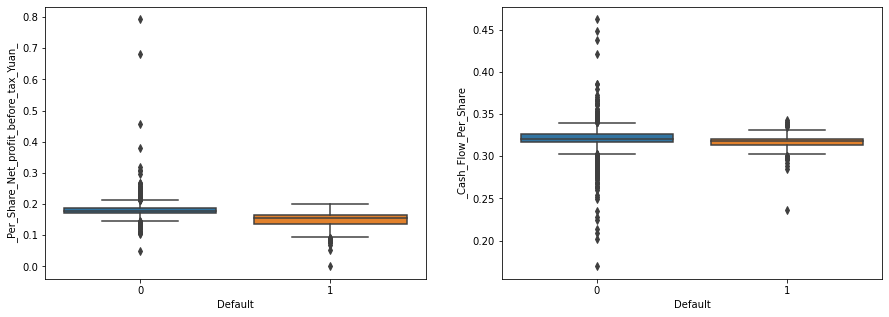

In [31]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df['Default'], df['_Per_Share_Net_profit_before_tax_Yuan_'])

plt.subplot(1,2,2)
sns.boxplot(df['Default'], df['_Cash_Flow_Per_Share'])
plt.show()

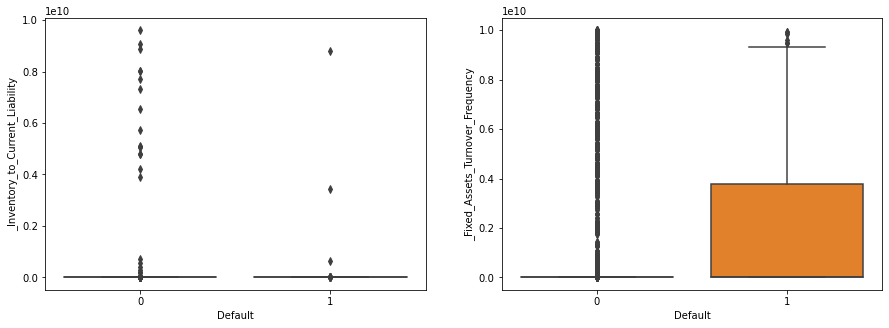

In [32]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(df['Default'], df['_Inventory_to_Current_Liability'])

plt.subplot(1,2,2)
sns.boxplot(df['Default'], df['_Fixed_Assets_Turnover_Frequency'])
plt.show()

In [33]:
# CORRELATION

corr = df.corr()
corr

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
Co_Code,1.000000,-0.000762,0.001389,0.026369,-0.004007,0.008944,-0.014242,0.012336,-0.018051,0.009023,...,-0.029759,0.015275,-0.038772,-0.020553,0.027197,-0.009654,0.002899,NaN,-0.005232,0.022952
_Operating_Expense_Rate,-0.000762,1.000000,-0.056053,-0.005952,-0.011800,0.045098,-0.029786,0.071273,-0.015138,0.040289,...,0.024649,-0.035987,-0.003893,-0.036773,0.000014,0.003302,-0.032517,NaN,-0.105709,-0.017544
_Research_and_development_expense_rate,0.001389,-0.056053,1.000000,0.012006,0.004101,-0.042044,0.037201,-0.034641,-0.006365,0.016900,...,0.028588,-0.079428,0.004292,0.009084,-0.020097,0.009770,-0.056302,NaN,-0.002040,0.064059
_Cash_flow_rate,0.026369,-0.005952,0.012006,1.000000,0.015416,0.057575,0.273687,0.102304,-0.012234,-0.005802,...,0.080332,-0.045854,-0.011922,-0.022361,0.041804,-0.004239,-0.000932,NaN,0.329836,-0.069656
_Interest_bearing_debt_interest_rate,-0.004007,-0.011800,0.004101,0.015416,1.000000,0.024528,0.015775,0.030109,-0.003742,-0.002188,...,-0.011035,0.064814,0.083278,-0.007255,-0.020884,-0.009217,-0.002019,NaN,0.051846,-0.031984
_Tax_rate_A,0.008944,0.045098,-0.042044,0.057575,0.024528,1.000000,0.104955,0.256484,0.010968,0.041409,...,0.055528,-0.052896,-0.043996,-0.037508,0.100098,-0.005767,0.051086,NaN,-0.025631,-0.188608
_Cash_Flow_Per_Share,-0.014242,-0.029786,0.037201,0.273687,0.015775,0.104955,1.000000,0.307426,-0.222966,-0.057979,...,0.107815,0.015231,-0.006815,0.005216,0.025101,0.002421,0.003407,NaN,0.050646,-0.078630
_Per_Share_Net_profit_before_tax_Yuan_,0.012336,0.071273,-0.034641,0.102304,0.030109,0.256484,0.307426,1.000000,0.001068,0.101983,...,0.109888,-0.106350,-0.199235,-0.036341,0.013218,-0.012304,0.021377,NaN,0.020859,-0.335090
_Realized_Sales_Gross_Profit_Growth_Rate,-0.018051,-0.015138,-0.006365,-0.012234,-0.003742,0.010968,-0.222966,0.001068,1.000000,0.005356,...,-0.012212,-0.005494,-0.002822,0.000770,-0.000260,-0.001949,-0.000894,NaN,-0.005243,-0.006118
_Operating_Profit_Growth_Rate,0.009023,0.040289,0.016900,-0.005802,-0.002188,0.041409,-0.057979,0.101983,0.005356,1.000000,...,-0.130006,-0.077678,-0.212507,-0.002386,-0.002040,0.002825,0.005596,NaN,-0.008420,-0.077024


<AxesSubplot:>

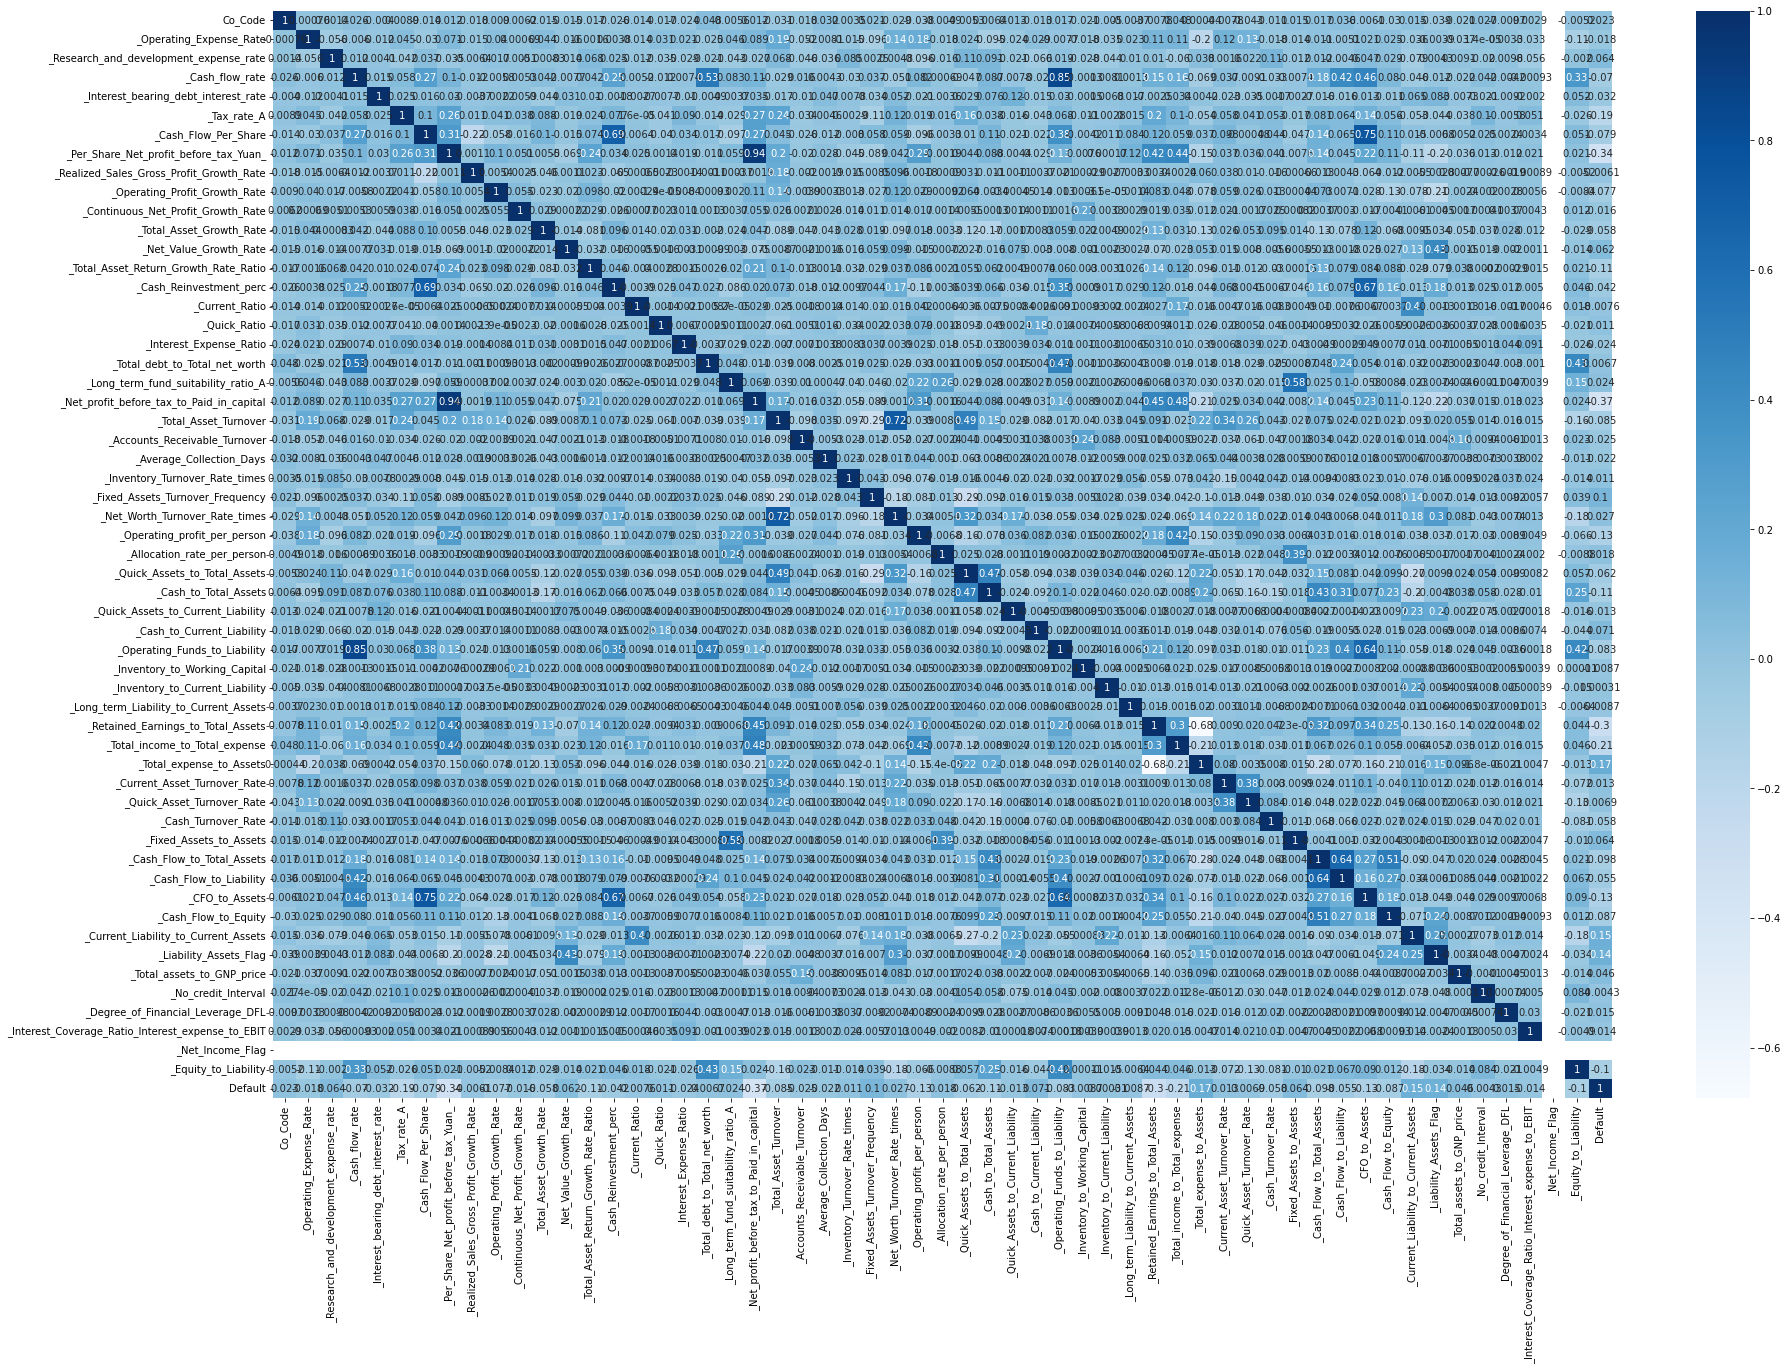

In [34]:
# HEATMAP

plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True , cmap="Blues")

# 1.4 Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('Default', axis = 1)
y = df['Default']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [38]:
print(X_train.shape)
print(X_test.shape)

(1378, 57)
(680, 57)


# 1.5 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach

In [39]:
import statsmodels.formula.api as SM

In [40]:
df1 = 'Default ~ _Equity_to_Liability + _Net_Income_Flag + _Tax_rate_A + _Net_Value_Growth_Rate + _Total_expense_to_Assets'

In [41]:
model_df = SM.logit(formula = df1, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.284527
         Iterations 9


In [42]:
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2053
Method:                           MLE   Df Model:                            4
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.1631
Time:                        10:27:56   Log-Likelihood:                -585.56
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                 3.122e-48
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.3864   4.21e+14  -9.19e-16      1.000   -8.24e+14    8.24e+14
_Equity_to_Liability       -39.0058        nan        nan        nan         nan         nan
_Net_Income_Flag            -0.3864   4.21e+14  -9.19e-16      1.000   -8.24e+14    8.24e+14
_Tax_rate_A                 -7.4674      0.979     -7.626      0.000      -9.386      -5.548
_Net_Value_Growth_Rate    2.936e-10   4.53e-10      0.649      0.516   -5.93e-10    1.18e-09
_Total_expense_to_Assets     9.6797      1.883      5.142      0.000       5.990      13.369
============================================================================================
"""

In [43]:
X = df.drop(['Default'], axis=1)
y = df['Default']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=df['Default'])
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [44]:
y_prob_pred_train = model_df.predict(df_train)
y_prob_pred_train

2011    0.146952
697     0.016447
160     0.186665
1273    0.215110
541     0.175714
          ...   
1386    0.015463
1127    0.048141
950     0.049069
1058    0.012990
562     0.196558
Length: 1378, dtype: float64

In [45]:
y_prob_pred_test = model_df.predict(df_test)
y_prob_pred_test

974     0.026287
134     0.167882
1267    0.010918
464     0.011125
579     0.015847
          ...   
1792    0.243953
443     0.149856
621     0.001965
518     0.140976
2057    0.253768
Length: 680, dtype: float64

In [46]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [47]:
from sklearn import metrics

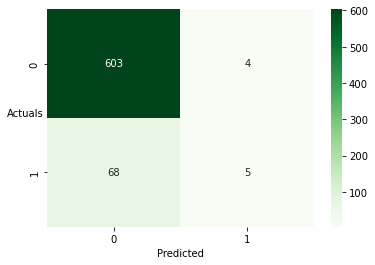

In [48]:
sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [49]:
y_prob_pred = model_df.predict()

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_test['Default'],y_prob_pred_test)

In [51]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.19121675977478814

# 1.6 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [52]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

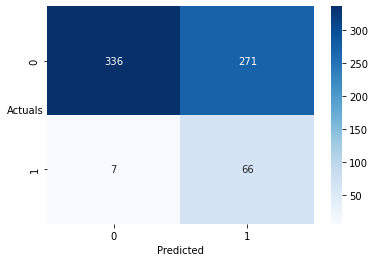

In [53]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [54]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

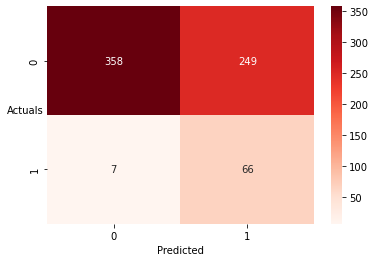

In [55]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [56]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

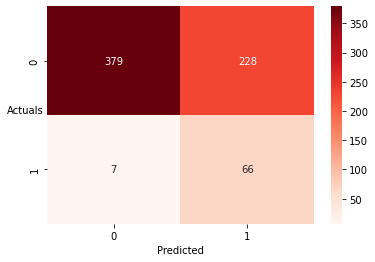

In [57]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [58]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.1:
        a=1
    else:
        a=0
    y_class_pred.append(a)

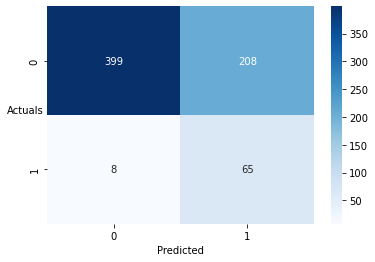

In [59]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

**AUC value and RUC curve**

Area under Curve (AUC) is: 0.848


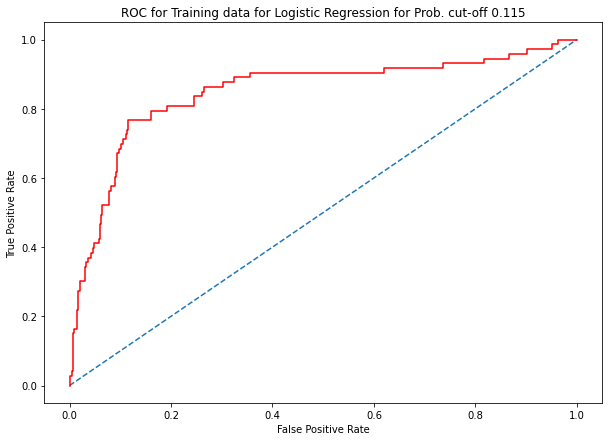

In [60]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
plt.figure(figsize=(10,7))
LOG_train_auc = roc_auc_score(df_test['Default'], y_prob_pred_test)
print('Area under Curve (AUC) is: %.3f' % LOG_train_auc)
LOG_train_fpr, LOG_train_tpr, LOG_train_thresholds = roc_curve(df_test['Default'], y_prob_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(LOG_train_fpr, LOG_train_tpr,color='red')
plt.title('ROC for Training data for Logistic Regression for Prob. cut-off 0.115')
plt.show()

In [61]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

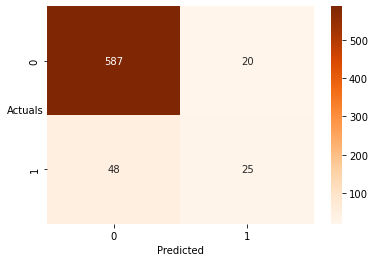

In [62]:
sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Oranges');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [63]:
print(metrics.classification_report(df_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.924     0.967     0.945       607
           1      0.556     0.342     0.424        73

    accuracy                          0.900       680
   macro avg      0.740     0.655     0.684       680
weighted avg      0.885     0.900     0.889       680



# END